In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
np.random.seed(1671)

In [3]:
EPOCHS=200
BATCH_SIZE=128
VERBOSE=1
NB_CLASSES=10 # no of outputs
N_HIDDEN=128 # number of input neurons
VALIDATION_SPLIT=0.2 # to reserve 20% of training data for validation

In [4]:
mnist=keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()
print(x_train[0].shape, "Training samples")
print(x_test[0].shape, "Test samples")

(28, 28) Training samples
(28, 28) Test samples


In [5]:
# normalise
x_train, x_test = x_train/255.0, x_test/255.0
RESHAPED=784 # to help convert 60000*28*28 to 60000*784

In [6]:
x_train=x_train.reshape(60000, RESHAPED)
x_test=x_test.reshape(10000, RESHAPED)

In [7]:
y_train=y_train.astype('float32')
y_test=y_test.astype('float32')

In [8]:
# creating model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(NB_CLASSES,
                                input_shape=(RESHAPED,),
                                kernel_initializer='zeros',
                                name='dense_layer',
                                activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compiling the model
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# fit the model
r=model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 5s 9ms/step - loss: 1.3533 - accuracy: 0.7765 - val_loss: 0.8781 - val_accuracy: 0.8432
Epoch 2/200
375/375 [==============================] - 2s 6ms/step - loss: 0.7804 - accuracy: 0.8414 - val_loss: 0.6478 - val_accuracy: 0.8648
Epoch 3/200
375/375 [==============================] - 2s 6ms/step - loss: 0.6350 - accuracy: 0.8570 - val_loss: 0.5550 - val_accuracy: 0.8738
Epoch 4/200
375/375 [==============================] - 2s 6ms/step - loss: 0.5646 - accuracy: 0.8658 - val_loss: 0.5035 - val_accuracy: 0.8798
Epoch 5/200
375/375 [==============================] - 3s 7ms/step - loss: 0.5216 - accuracy: 0.8718 - val_loss: 0.4701 - val_accuracy: 0.8865
Epoch 6/200
375/375 [==============================] - 4s 10ms/step - loss: 0.4921 - accuracy: 0.8767 - val_loss: 0.4467 - val_accuracy: 0.8894
Epoch 7/200
375/375 [==============================] - 3s 7ms/step - loss: 0.4702 - accuracy: 0.8800 - val_loss: 0.4289 - val_accuracy: 0.892

In [11]:
# evaluating the model
test_loss, test_acc=model.evaluate(x_test, y_test)
print("Test accuracy: ", test_acc)

p_test=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2769 - accuracy: 0.9220
Test accuracy:  0.921999990940094
313/313 [==============================] - 1s 1ms/step


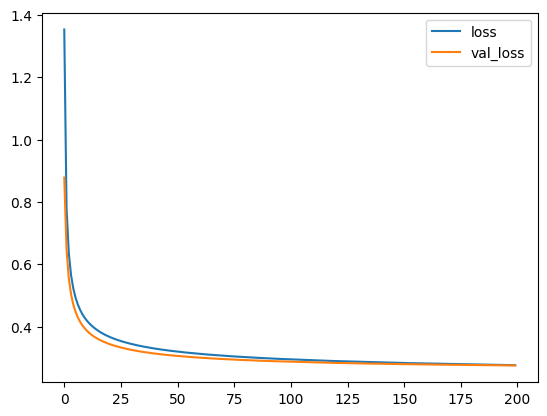

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend(loc="upper right")
plt.show()

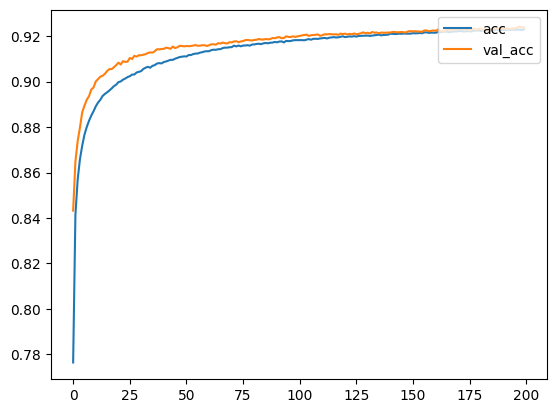

In [14]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend(loc="upper right")
plt.show()